# Demonstration for Day One

The goal for this demo is two-fold:

First, to show you an example of what a Machine Learning program can do.

Second, to show you how to interact with a jupyter notebook.

You will run your own version of this notebook for your homework this afternoon.

We are going to piggy-back on Google's AI to train a network to be able to distinguish between different types of images.  We will give as input words and/or phrases to go into a Google image search.  We will then train a network on those images, and then test that network by giving it new images.  The network will then try to classify the new images into the categories defined by the original labels we used for the search.

In [ ]:
!pip install git+https://github.com/williamedwardhahn/greentree
from greentree import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/greentree to /tmp/pip-req-build-iqya5dp0
  Running command git clone --filter=blob:none --quiet https://github.com/williamedwardhahn/greentree /tmp/pip-req-build-iqya5dp0
  Resolved https://github.com/williamedwardhahn/greentree to commit 1fe09a31fc43a728ccebe524bacefcb97de0a4cb
  Preparing metadata (setup.py) ... done
  Created wheel for ImportGreenTree: filename=ImportGreenTree-0.0.1-py3-none-any.whl size=11091 sha256=ad5af8b9de3cf4556ad0d8cb15b09cad30e08ac967c79b718ade0b7538157a11
  Stored in directory: /tmp/pip-ephem-wheel-cache-hhrnfk0k/wheels/f8/b2/98/f7398d57640d6bfa6e15e3db04bed494a94e812fcb1380a564
Successfully built ImportGreenTree


In [ ]:
# First, we define our image search terms.
s = ["basketball","orange","nerf ball"]

# Pull the Training Images from Google

These will be saved to a directory on Google's colaboratory virtual machine.  See the file structure to the left.

In [ ]:
[get_images(s[i], limit = 100) for i in np.arange(len(s))]
remove_transparency_list("/content/image_set/")
split("/content/image_set/")
os.chdir("/content/")
data_dir = 'image_set'

OK: gettyimages-154565900.jpg
OK: basketball3.jpg
OK: basketball.jpg
OK: basketball-1.jpg
OK: Basketball.png
OK: Sport_Basketball_Game_Photo.jpg
OK: 8992142-ncaa-basketball-navy-at-vmi.jpeg
Invalid image, not saving reel-talk-the-corbin-smith-review-of.jpg
OK: basketball-2.jpg
OK: basketball-wallpaper-1.jpg
OK: Basketball.jpgOK: Basketball_game.jpg

OK: photo1.jpg
OK: basketball-3.jpg
OK: 13-0720+-+basketball.jpg
OK: basketball_hoop-986.jpg
OK: spalding_official_nba_game_basketbal.jpg
OK: basketball-4.jpg
OK: basketball-4k-lu.jpg
OK: basketball_large.jpg
OK: istock_000002780724medium_wide-992e3.jpg
OK: pexels-photo-2807137.jpeg
OK: Basketball-1.jpg
OK: 12_15_16olemiss_ball_net2.jpg
OK: basketball-wallpaper-1-1.jpg
OK: Basketball-2.jpg
OK: 9216068-ncaa-basketball-ncaa-tournam.jpeg
OK: basketball_hoop-977.jpg
OK: basketball-5.jpg
OK: padre_basketball.gif
OK: 78OC_DERRICKROSECHICITY.jpg
OK: wilson_derrick_rose_wave_basketball_.jpg
OK: howtoplay_basketball.png
OK: orange3+ort.jpg
OK: orang

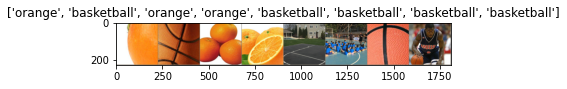

Class Names:  ['basketball', 'nerf ball', 'orange'] Dataset Size:  {'train': 142, 'val': 32}


In [ ]:
labels = data_show(data_dir,8)

# Train the Model

In [ ]:
model = train_model(data_dir, num_epochs=5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 0/4
----------
train Loss: 1.0032 Acc: 0.5000
val Loss: 0.2344 Acc: 0.9062
Epoch 1/4
----------
train Loss: 0.3524 Acc: 0.8662
val Loss: 0.0765 Acc: 0.9688
Epoch 2/4
----------
train Loss: 0.3983 Acc: 0.8521
val Loss: 0.0697 Acc: 0.9688
Epoch 3/4
----------
train Loss: 0.3544 Acc: 0.8803
val Loss: 0.0404 Acc: 1.0000
Epoch 4/4
----------
train Loss: 0.4183 Acc: 0.8169
val Loss: 0.0419 Acc: 1.0000
Training complete in 0m 42s
Best val Acc: 1.000000


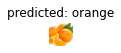

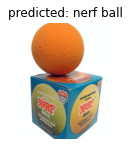

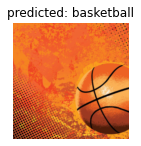

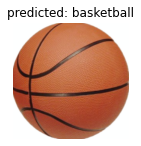

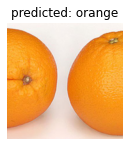

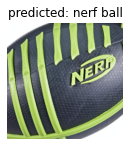

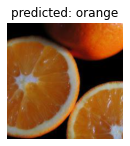

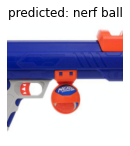

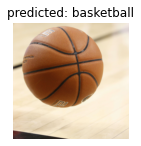

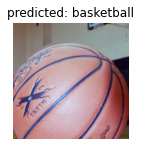

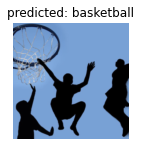

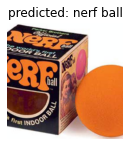

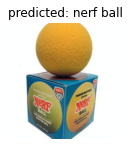

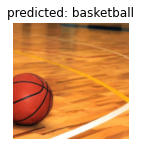

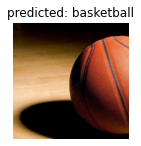

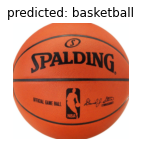

<Figure size 1440x1440 with 0 Axes>

In [ ]:
show_output(model,data_dir)

# Evaluate Your Results

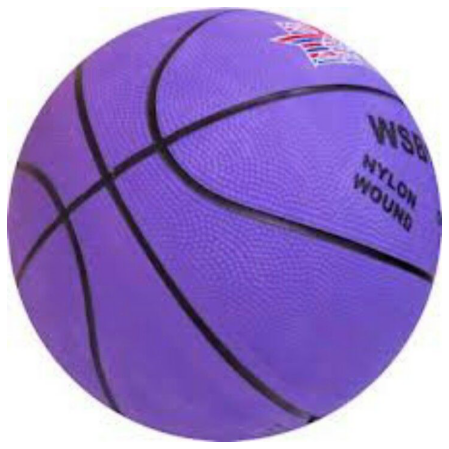

In [ ]:
im = imageio.imread('https://i.pinimg.com/originals/29/4b/cc/294bcc3c8324fcc9c83148aca567b6d2.jpg')[:,:,:3]
plot(im)

In [ ]:
inference(im,model)

1

In [ ]:
print(labels)
print(labels[inference(im,model)])

['basketball', 'nerf ball', 'orange']
nerf ball


The following block is just a little function you can use to be dramatic.  If you give the function the URL for an image, it will display the image and print underneath it the label it thinks best matches the image.  Run the block to define the function, and then try passing it three examples of images to see how well it does.

In [ ]:
def label_image(url,show=True):
    im = imageio.imread(url)[:,:,:3]
    if show:
        plot(im)
    return labels[inference(im,model)]

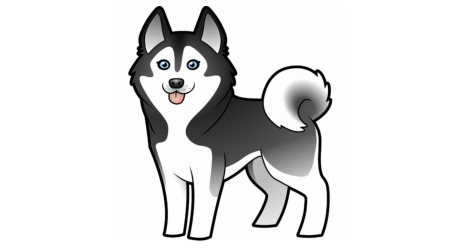

'pug dog'

In [ ]:
label_image('https://rlv.zcache.com/cartoon_siberian_husky_alaskan_malamute_cutout-rb8323d2f37ad4624bb4cd6fe72bcf1b7_x7sai_8byvr_630.jpg?view_padding=[285,0,285,0]')

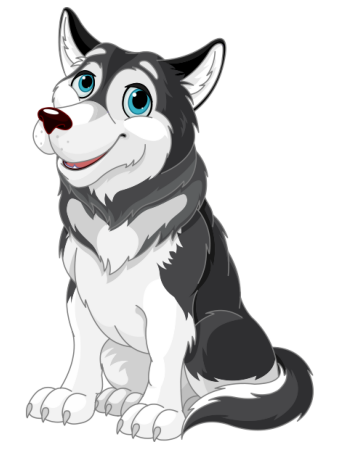

'pug dog'

In [ ]:
label_image('http://3.bp.blogspot.com/-mnktHkzpT9A/VYIHWsk60RI/AAAAAAAAP5I/Gs5q2xgKpdI/s1600/husky-icon.png')

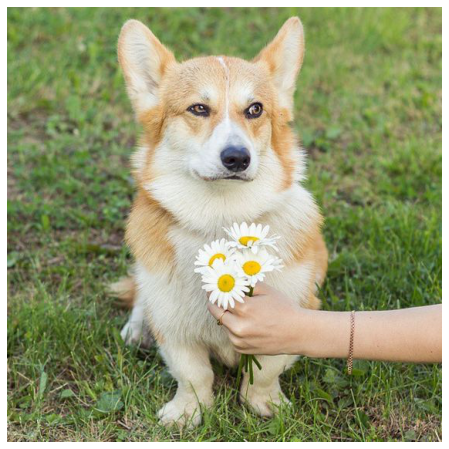

'husky'

In [ ]:
label_image('http://thedailycorgi.com/wp-content/uploads/2016/08/suscorg.jpg')